# Project: Stock Price Predictor

In this project, our aim is to build up a model and accurately predict the future return of a stock, as well as suggesting buying and selling points of stocks. The project is divided into 2 parts, first building the model, and next giving suggestions based in indexes. We will be using linear regression technique to build our benchmark model and predict the returns, then we will be using MACD index and RSI index. We will be using yahoo finance as our data source. 


## Get the Data

We first download the data from yahoo finance, and save the data to local storage. 

In [1]:
import pandas as pd
import datetime
import sys
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install lstm
# !{sys.executable} -m pip install keras
# !{sys.executable} -m pip install yfinance

import yfinance as yf

tickers = ['NKE', 'CVS', 'SWK', 'SHW', 'MSFT', 'DISH', 'GIS', 'MA', 'CAG', 'BBY']


index_name = "NKE"
data = yf.download(index_name, '2010-01-01','2018-12-31', interval="1d")
file_name = index_name + ".csv"
data.to_csv(file_name,index = False)
print(data)

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  16.514999  16.517500  16.280001  16.337500  13.810924  11972400
2010-01-05  16.285000  16.447500  16.174999  16.402500  13.865874   6275200
2010-01-06  16.350000  16.422501  16.235001  16.302500  13.781338  13399200
2010-01-07  16.280001  16.500000  16.262501  16.462500  13.916593   7187600
2010-01-08  16.447500  16.462500  16.235001  16.430000  13.889119   7249600
...               ...        ...        ...        ...        ...       ...
2018-12-21  73.290001  74.290001  71.250000  72.370003  68.768860  28487900
2018-12-24  71.400002  71.930000  68.080002  68.099998  64.711319   8551400
2018-12-26  68.699997  73.010002  68.650002  73.010002  69.377007  10019200
2018-12-27  72.180000  73.730003  70.989998  73.669998  70.004166   9004900
2018-12-28  73.9700

## Preprocess the data

We want to normalize the data for better prediction, so we need to process the data.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv(file_name)
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


        Open       High        Low    Close  Adj Close    Volume
0  16.514999  16.517500  16.280001  16.3375  13.810924  11972400
1  16.285000  16.447500  16.174999  16.4025  13.865874   6275200
2  16.350000  16.422501  16.235001  16.3025  13.781338  13399200
3  16.280001  16.500000  16.262501  16.4625  13.916593   7187600
4  16.447500  16.462500  16.235001  16.4300  13.889119   7249600


Open   --- mean : 42.013183802774506   	 Std:  18.248695007159213   	 Max:  86.0   	 Min:  15.404999732971191
High   --- mean : 42.385761164059645   	 Std:  18.4128700943054   	 Max:  86.04000091552734   	 Min:  15.529999732971191
Low    --- mean : 41.64964652640916   	 Std:  18.07490291259663   	 Max:  85.01000213623047   	 Min:  15.22249984741211
Close  --- mean : 42.024994489422845   	 Std:  18.23795426460851   	 Max:  85.55000305175781   	 Min:  15.324999809265137
Volume --- mean : 9289047.768448962   	 Std:  5370436.262029271   	 Max:  86339600   	 Min:  2439600


**Remove Unncessary data, and keep only open, close, volume** 

In [3]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

E:\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   Item       Open    Close    Volume
0     0  16.514999  16.3375  11972400
1     1  16.285000  16.4025   6275200
2     2  16.350000  16.3025  13399200
3     3  16.280001  16.4625   7187600
4     4  16.447500  16.4300   7249600
---
      Item       Open      Close    Volume
2257  2257  68.730003  67.529999  14488500
2258  2258  73.290001  72.370003  28487900
2259  2259  71.400002  68.099998   8551400
2260  2260  68.699997  73.010002  10019200
2261  2261  72.180000  73.669998   9004900


**Now we want to visualize the data**

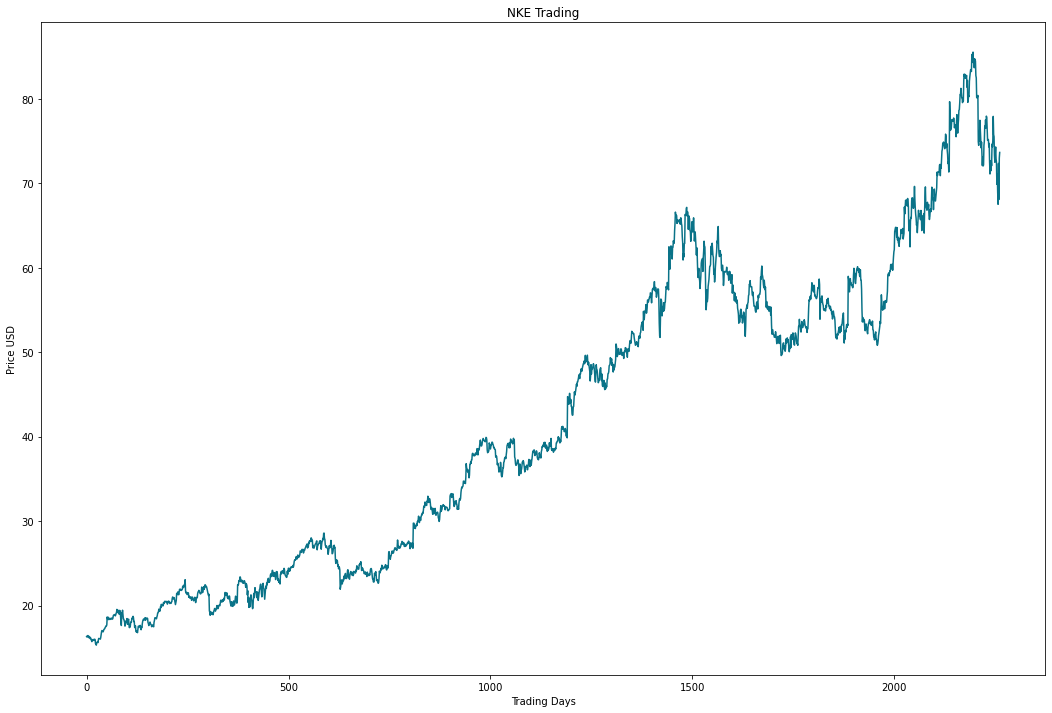

In [4]:
import visualize

visualize.plot_basic(stocks, title=index_name+" Trading")

**Normalize the data using minmaxscaler function** 

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['Open', 'Close', 'Volume']
stocks[numerical] = scaler.fit_transform(stocks[numerical])
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.015723  0.014418  0.113621
1     1  0.012465  0.015344  0.045716
2     2  0.013386  0.013920  0.130627
3     3  0.012395  0.016198  0.056591
4     4  0.014767  0.015735  0.057330


Open   --- mean : 0.3767130290655942   	 Std:  0.25838021433094566   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.38000924889641047   	 Std:  0.2595954811193934   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.08165452588182866   	 Std:  0.06401942329574484   	 Max:  1.0   	 Min:  0.0


**Visualize the data again**

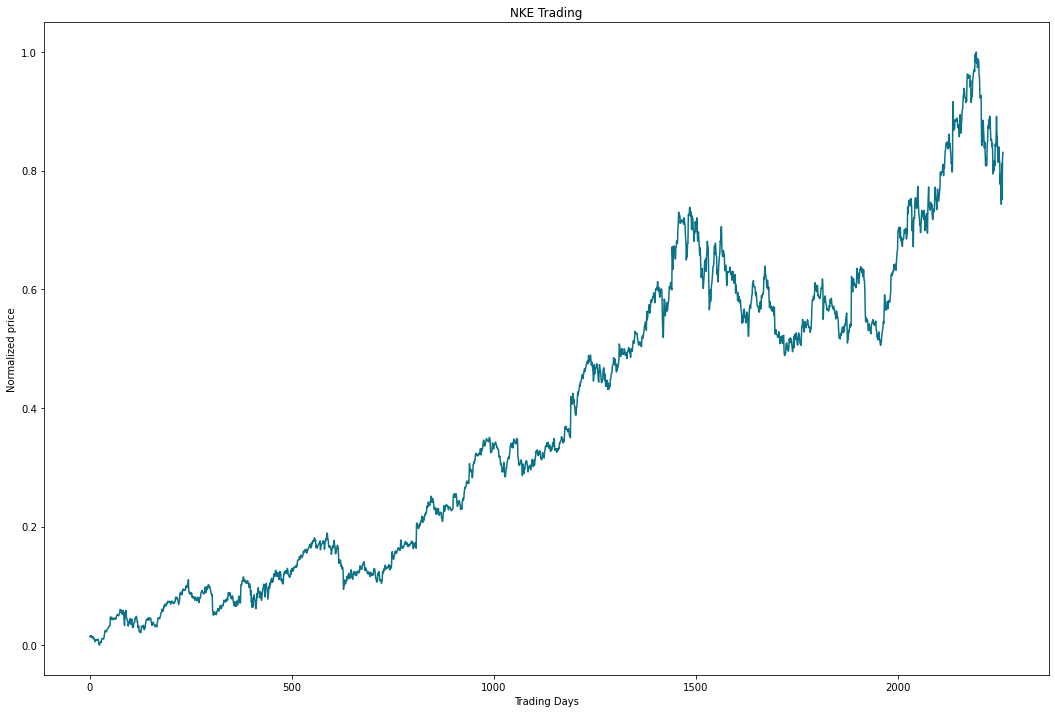

In [6]:
visualize.plot_basic(stocks, title=index_name+" Trading", y_label="Normalized price")

**Save the processed data** 

In [7]:
file_name = file_name[:-4] + "_preprocessed.csv"
stocks.to_csv(file_name,index= False)

## Linear Regression Model

We use linear regression to train a basic model, and predict the returns.

**Load the preprocessed data** 

In [8]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv(file_name)
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.015723,0.014418,0.113621
1,1,0.012465,0.015344,0.045716
2,2,0.013386,0.013920,0.130627
3,3,0.012395,0.016198,0.056591
4,4,0.014767,0.015735,0.057330


**Split data into train and test sets, and train the model** 

In [9]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
model = LinearRegressionModel.build_model(X_train,y_train)

x_train (1550, 1)
y_train (1550, 1)
x_test (712, 1)
y_test (712, 1)


**Get prediction on test set and plot** 

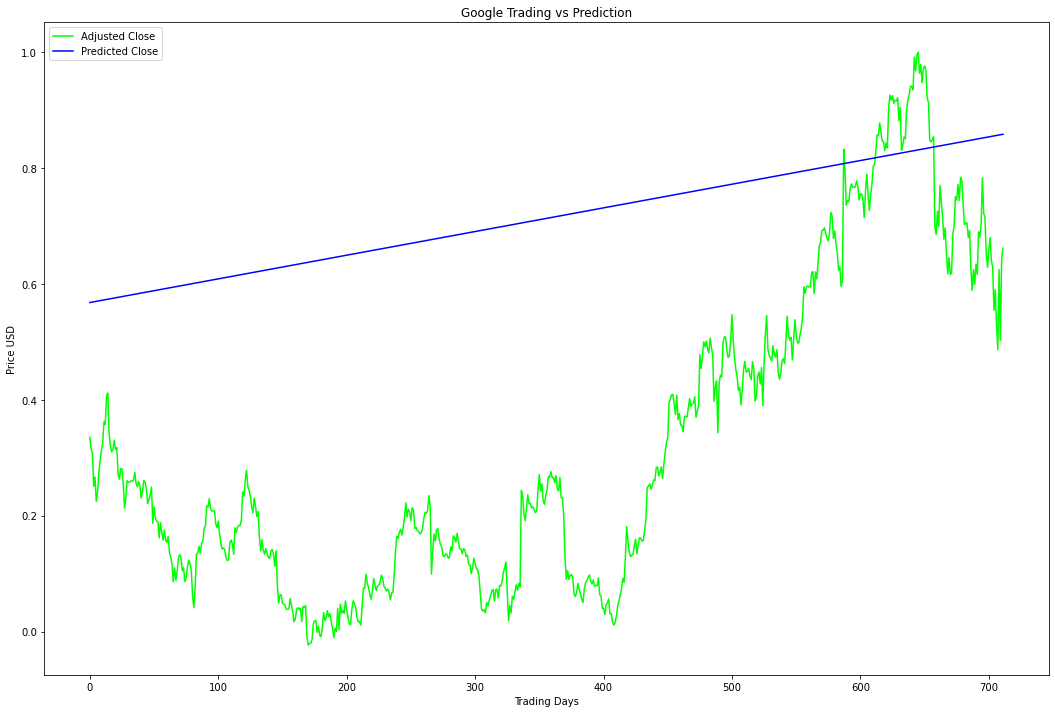

In [10]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)
vs.plot_prediction(y_test,predictions)

**Accuracy of the prediction** 

In [11]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.0507 MSE (0.2252 RMSE)
Test Score: 0.19799599 MSE (0.44496740 RMSE)


## Long-Sort Term Memory Model

We use LSTM to train a more accurate model, and predict the returns.

### Basic LSTM Model

First lets build a basic LSTM model. We would use keras libraries to do so.

In [12]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv(file_name)
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())
print(stocks_data)

,Open,Close,Volume
0,0.015723,0.014418,0.113621
1,0.012465,0.015344,0.045716
2,0.013386,0.013920,0.130627
3,0.012395,0.016198,0.056591
4,0.014767,0.015735,0.057330


          Open     Close    Volume
0     0.015723  0.014418  0.113621
1     0.012465  0.015344  0.045716
2     0.013386  0.013920  0.130627
3     0.012395  0.016198  0.056591
4     0.014767  0.015735  0.057330
...        ...       ...       ...
2257  0.755365  0.743396  0.143610
2258  0.819959  0.812318  0.310468
2259  0.793187  0.751513  0.072846
2260  0.754940  0.821431  0.090341
2261  0.804235  0.830829  0.078251

[2262 rows x 3 columns]


**Split train and test data sets for lstm model** 

In [13]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1706, 50, 3)
y_train (1706,)
x_test (446, 50, 3)
y_test (446,)


**Build a basic Long-Short Term Memory model** 

In [14]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)



compilation time :  0.04001569747924805


**Train the model** 

In [15]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)


51/51 [==============================] - 4s 35ms/step - loss: 0.0077 - val_loss: 4.9976e-04


**make prediction using test data** 

In [16]:
predictions = model.predict(X_test)

14/14 [==============================] - 1s 8ms/step


**Step 6:** Plot the results

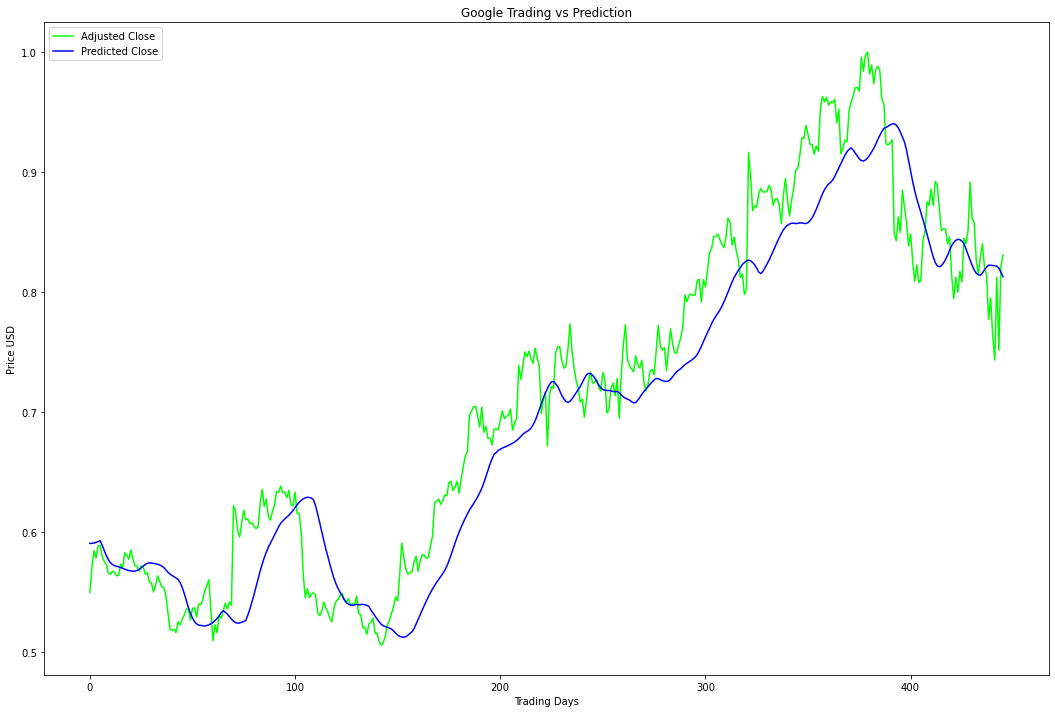

In [17]:
vs.plot_lstm_prediction(y_test,predictions)

**Get the test score** 

In [18]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00049102 MSE (0.02215907 RMSE)
Test Score: 0.00186387 MSE (0.04317260 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [19]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0039043426513671875


**Step 2: ** Train improved LSTM model

In [20]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
17/17 - 4s - loss: 0.0178 - val_loss: 0.0018 - 4s/epoch - 250ms/step
Epoch 2/5
17/17 - 1s - loss: 0.0025 - val_loss: 0.0022 - 830ms/epoch - 49ms/step
Epoch 3/5
17/17 - 1s - loss: 0.0014 - val_loss: 0.0016 - 875ms/epoch - 51ms/step
Epoch 4/5
17/17 - 1s - loss: 0.0011 - val_loss: 5.7727e-04 - 815ms/epoch - 48ms/step
Epoch 5/5
17/17 - 1s - loss: 0.0011 - val_loss: 3.8552e-04 - 830ms/epoch - 49ms/step


**Step 3:** Make prediction on improved LSTM model

In [21]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

5/5 [==============================] - 1s 16ms/step


**Step 4:** plot the results

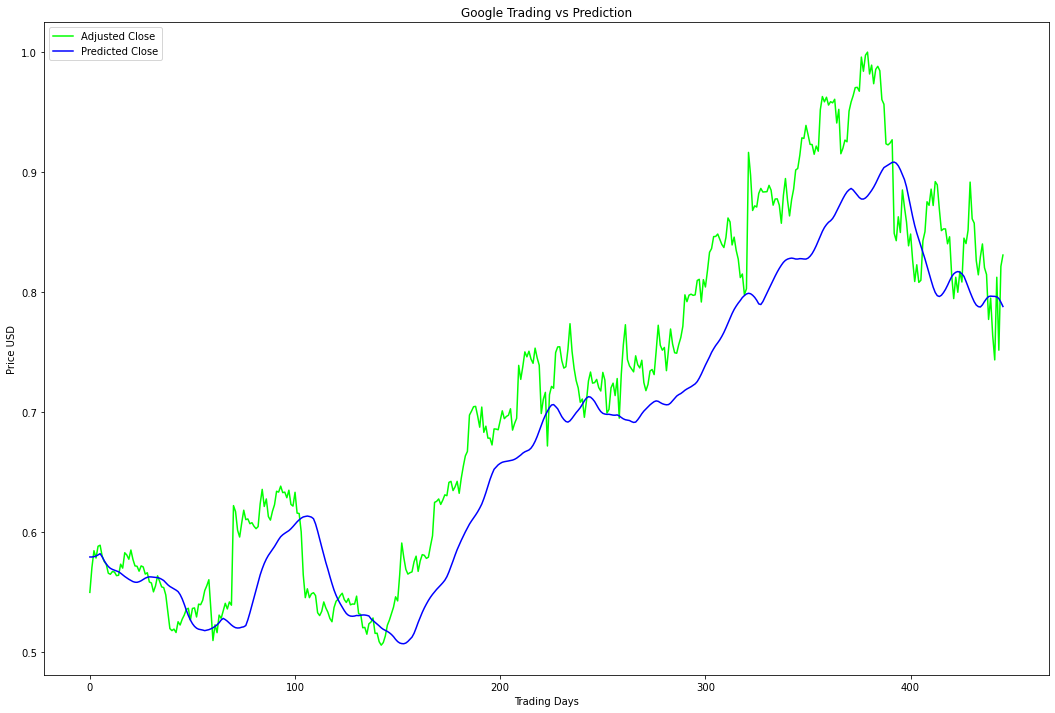

In [22]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [23]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00051944 MSE (0.02279113 RMSE)
Test Score: 0.00289018 MSE (0.05376035 RMSE)


In [24]:
range_ = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range_[1]-range_[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.002890 - RMSE * Adjusted Close Range


## Getting the annualized predicted return


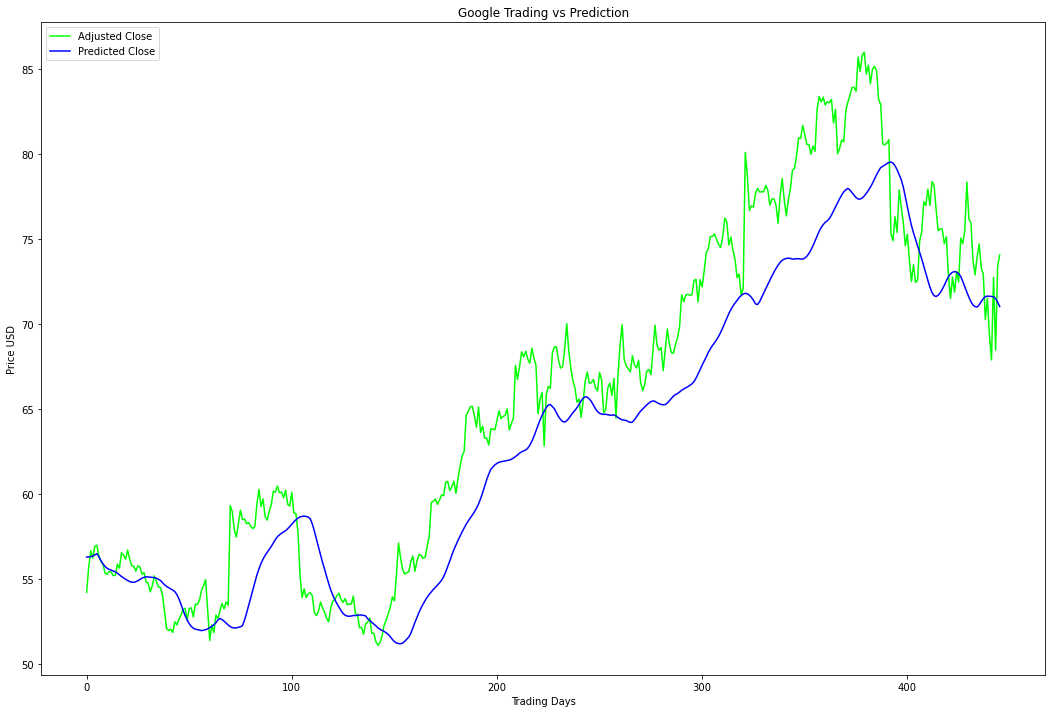

In [25]:
tmp = pd.DataFrame(predictions, columns=["price"])
tmp["tmp1"] = np.nan
tmp["tmp2"] = np.nan

returndf = scaler.inverse_transform(tmp)[:, [0]]
tmp = pd.DataFrame(y_test, columns=["price"])
tmp["tmp1"] = np.nan
tmp["tmp2"] = np.nan
returntest = scaler.inverse_transform(tmp)[:, [0]]
vs.plot_lstm_prediction(returntest,returndf)

# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [26]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].values
Y = stocks[:]['Close'].values

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# # Generate predictions 
# predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.878773  0.905268  0.094819
1  0.905493  0.905763  0.032540
2  0.905493  0.890923  0.027498
3  0.890649  0.882513  0.021253
4  0.882237  0.895374  0.018493
(2768, 1, 3)
(2768,)
Test Score: 0.3650 MSE (0.6041 RMSE)


In [27]:
# Cut DataFrame
data = data.iloc[40::]
# Reset index
data = data.reset_index()
# Delete old index
data = data.drop('index', 1)
# Normalize data
# data_n = (data - data.mean()) / (data.max() - data.min())

C:\Users\wxr\AppData\Local\Temp/ipykernel_19856/3671388292.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('index', 1)


In [28]:
import network as nt
import indicators as ind
import mpl_finance_ext as mfe
import matplotlib.pyplot as plt
predict = pd.DataFrame(predictions, columns=["Close"])
i_counter = 0
item = []
for i in range(len(predict)):
    item.append(i_counter)
    i_counter += 1
predict["Item"] = item
data = ind.relative_strength_index(df=predict, n=14)
data = ind.macd(df=predict, n_fast=12, n_slow=26)


Instructions for updating:
non-resource variables are not supported in the long term
        Close  Item
0    0.579105     0
1    0.579080     1
2    0.579344     2
3    0.579892     3
4    0.580806     4
..        ...   ...
441  0.796369   441
442  0.795945   442
443  0.794585   443
444  0.791514   444
445  0.787938   445

[446 rows x 2 columns]
1       0.000000
2      45.289781
3      72.841905
4      85.733185
5      91.012994
         ...    
441    35.920683
442    35.406039
443    33.733621
444    30.258695
445    26.796802
Name: Close, Length: 445, dtype: float64


In [29]:
test_dataset_size = 0.05

dataset_train_length = len(data.index) -int(len(data.index) * test_dataset_size)
print(data)

        Close  Item     RSI_14  MACD_12_26  MACDsign_12_26  MACDdiff_12_26
0    0.579105     0        NaN         NaN             NaN             NaN
1    0.579080     1   0.000000         NaN             NaN             NaN
2    0.579344     2  45.289781         NaN             NaN             NaN
3    0.579892     3  72.841905         NaN             NaN             NaN
4    0.580806     4  85.733185         NaN             NaN             NaN
..        ...   ...        ...         ...             ...             ...
441  0.796369   441  35.920683   -0.007688       -0.009679        0.001991
442  0.795945   442  35.406039   -0.007139       -0.009171        0.002032
443  0.794585   443  33.733621   -0.006737       -0.008684        0.001948
444  0.791514   444  30.258695   -0.006589       -0.008265        0.001676
445  0.787938   445  26.796802   -0.006684       -0.007949        0.001265

[446 rows x 6 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


        Close  Item     RSI_14  MACD_12_26  MACDsign_12_26  MACDdiff_12_26
0    0.579105     0        NaN         NaN             NaN             NaN
1    0.579080     1   0.000000         NaN             NaN             NaN
2    0.579344     2  45.289781         NaN             NaN             NaN
3    0.579892     3  72.841905         NaN             NaN             NaN
4    0.580806     4  85.733185         NaN             NaN             NaN
..        ...   ...        ...         ...             ...             ...
441  0.796369   441  35.920683   -0.007688       -0.009679        0.001991
442  0.795945   442  35.406039   -0.007139       -0.009171        0.002032
443  0.794585   443  33.733621   -0.006737       -0.008684        0.001948
444  0.791514   444  30.258695   -0.006589       -0.008265        0.001676
445  0.787938   445  26.796802   -0.006684       -0.007949        0.001265

[446 rows x 6 columns]
Buying-------------------------
38      38
102    102
203    203
229    229


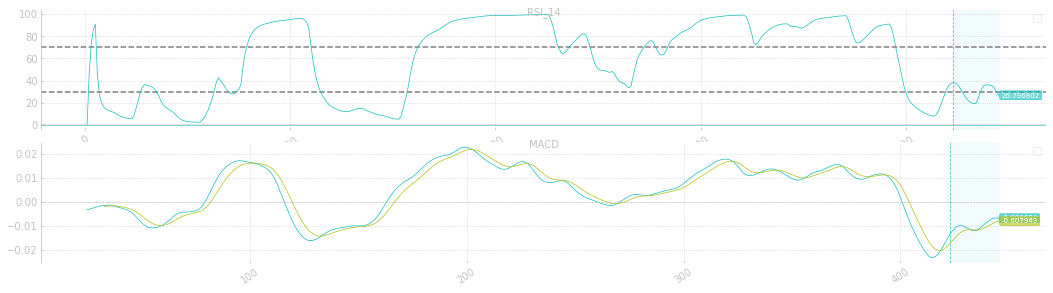

In [32]:
fig, _ = plt.subplots(facecolor=mfe.background_color)
# ax0 = plt.subplot2grid(
#     (10, 8), (0, 0),
#     rowspan=6, colspan=8,
#     facecolor=mfe.background_color
# )

    # Plot RSI
ax1 = plt.subplot2grid(
    (10, 1), (6, 0),
    rowspan=2, colspan=8,
    facecolor=mfe.background_color
)
ax1.axhline(30, linestyle='--', linewidth=1.5, color='grey')
ax1.axhline(70, linestyle='--', linewidth=1.5, color='grey')

mfe.plot(
    data=data,
    name='RSI_14',
    plot_columns=['RSI_14'],
    axis=ax1,
    fig=fig,
    xhline_red=0.8,
    xhline_green=0.2,
    vline=dataset_train_length - 1,
    vspan=[dataset_train_length - 1, len(data.index)]
)

    # Plot MACD
ax1 = plt.subplot2grid(
    (10, 8), (8, 0),
    rowspan=2, colspan=8,
    facecolor=mfe.background_color
)

mfe.plot(
    data=data,
    name='MACD',
    plot_columns=['MACD_12_26', 'MACDsign_12_26'],
    axis=ax1,
    fig=fig,
    xhline_dashed1=0,
    vline=dataset_train_length - 1,
    vspan=[dataset_train_length - 1, len(data.index)]
)
print(data)
previous_15 = data['MACD_12_26'].shift(1)
previous_45 = data['MACDsign_12_26'].shift(1)
buying = (((data['MACD_12_26'] <= data['MACDsign_12_26']) & (previous_15 >= previous_45)))
buying_dates = data.loc[buying, 'Item']
selling = (((data['MACD_12_26'] >= data['MACDsign_12_26']) & (previous_15 <= previous_45)))
selling_dates = data.loc[selling, 'Item']
print("Buying-------------------------")
print(buying_dates)
print("Selling-------------------------")
print(selling_dates)

plt.show()